### Download a Sample WSI from here ......

### Downlad ASAP 

### Load WSI in ASAP

### make Annotations in ASAP

### Save Annotations as xml files

### set path to WSI and xml annotation files

In [1]:
from prepare_data import PrepareData
import matplotlib.pyplot as plt 

In [2]:
path_to_WSI_folder = "/home/sven/Desktop/data/Test_WSI"
path_to_xml_folder = "/home/sven/Desktop/data/Test_WSI/xml_files"

### Show images and masks without saving

In [3]:
image_minimum_width = 761
image_minimum_height = 517
data = PrepareData(path_to_WSI_folder, path_to_xml_folder, image_minimum_width, image_minimum_height, save=False, target_path=None)


number of iterations: 2.705650459921156 3.9825918762088977
686
1029
number of iterations: 2.705650459921156 3.9825918762088977
686
1029
number of iterations: 2.706964520367937 3.9825918762088977
686
1030


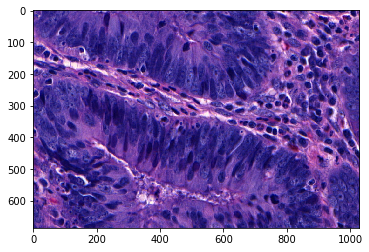

(686, 1029, 3)


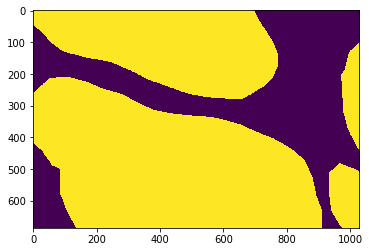

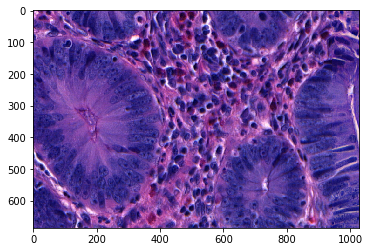

(686, 1029, 3)


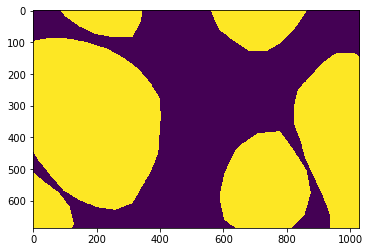

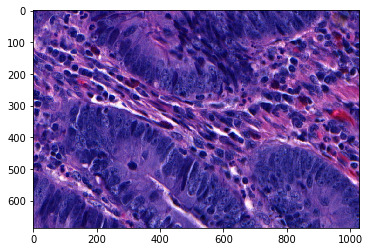

(686, 1029, 3)


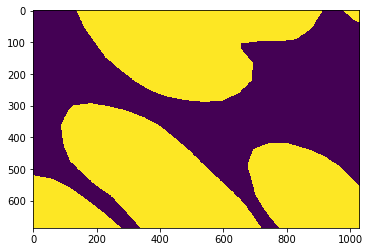

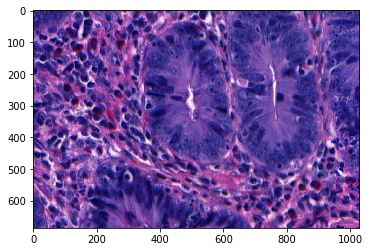

(686, 1029, 3)


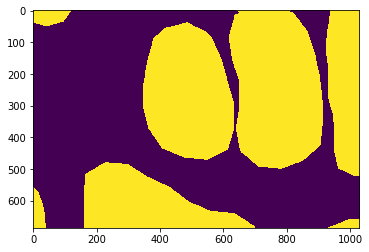

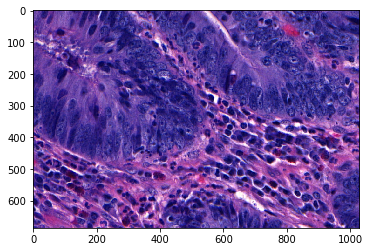

(686, 1029, 3)


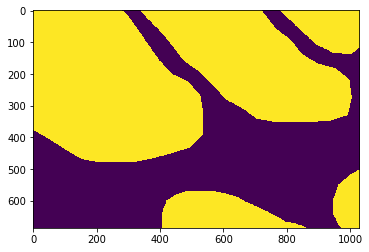

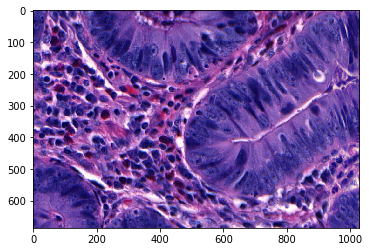

(686, 1029, 3)


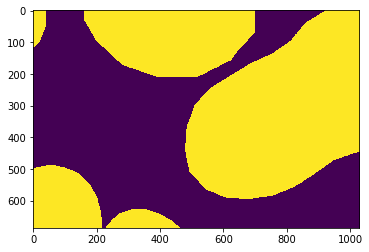

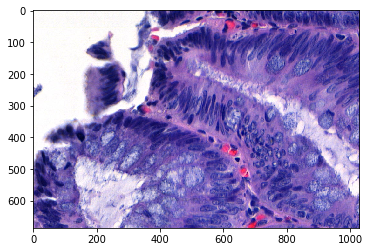

(686, 1029, 3)


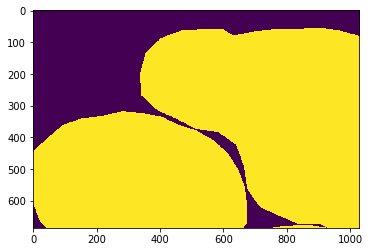

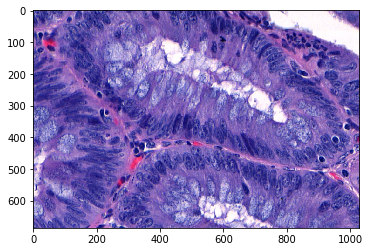

(686, 1029, 3)


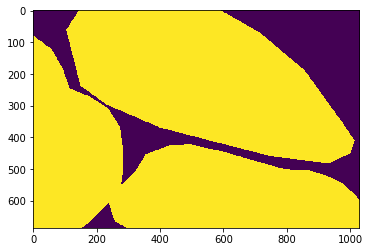

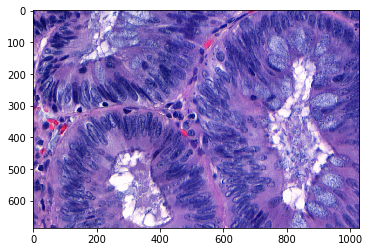

(686, 1029, 3)


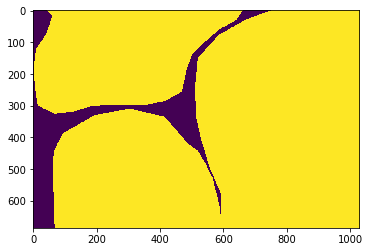

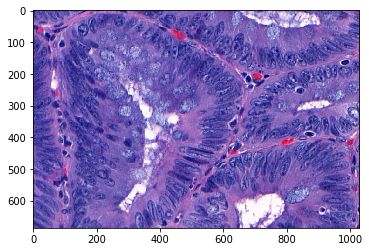

(686, 1029, 3)


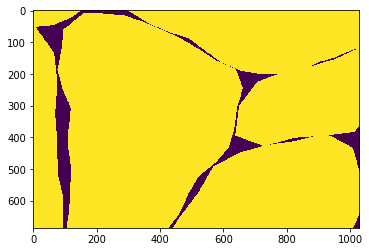

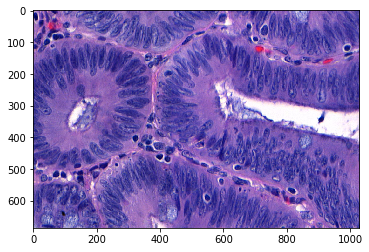

(686, 1029, 3)


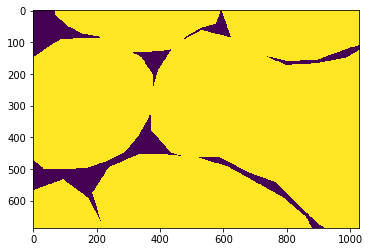

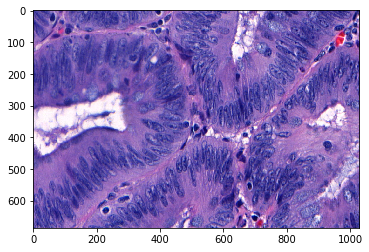

(686, 1029, 3)


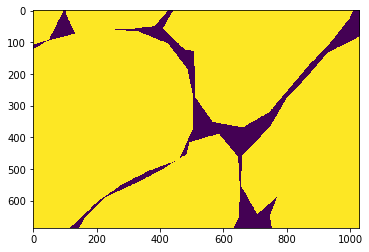

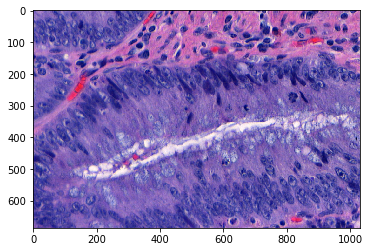

(686, 1030, 3)


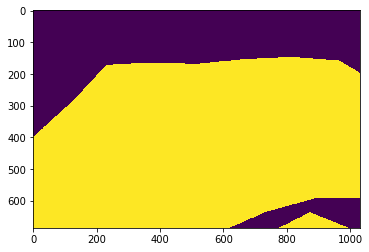

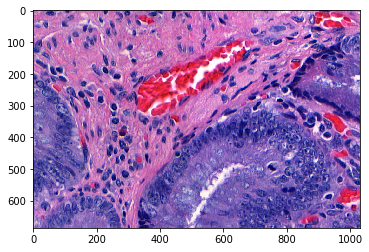

(686, 1029, 3)


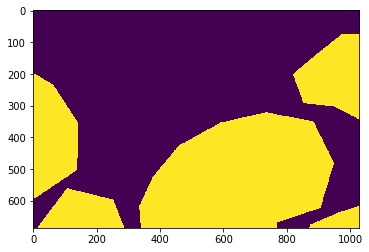

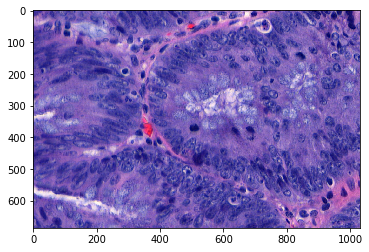

(686, 1030, 3)


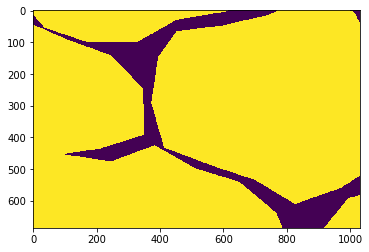

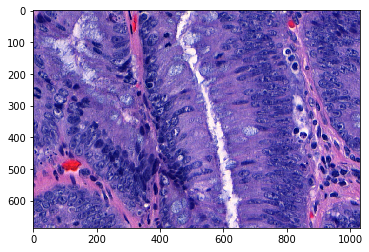

(686, 1029, 3)


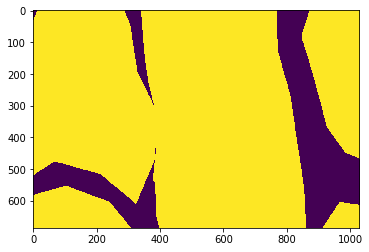

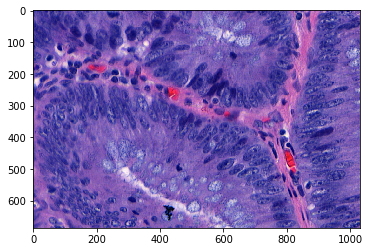

(686, 1030, 3)


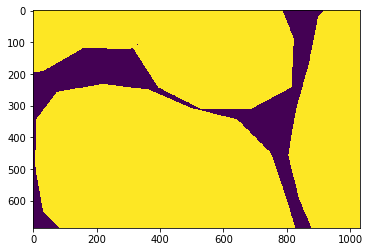

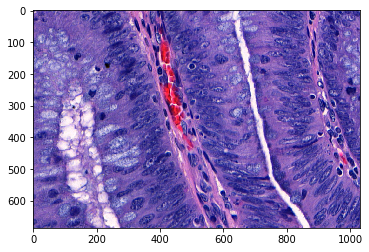

(686, 1029, 3)


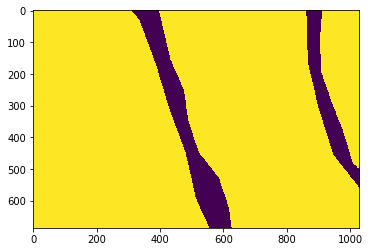

In [8]:
all_images, all_masks = PrepareData.create_images_and_masks(data)
for img_of_one_ROI, mask_of_one_ROI in zip(all_images, all_masks):
    for i, m in zip(img_of_one_ROI, mask_of_one_ROI):
        img = img_of_one_ROI[i]
        mask = mask_of_one_ROI[m]
        plt.imshow(img)
        plt.show()
        print(mask.shape)
        plt.imshow(mask[:,:,1])
        plt.show()

In [ ]:
target_path = "crazy/programmer" 
data_path = target_path + "/data"
data_path

### Save images and masks

In [ ]:
target_path="/home/sven/Desktop/data/test"
image_minimum_width = 761
image_minimum_height = 517

In [ ]:
data = PrepareData(path_to_WSI_folder, path_to_xml_folder,  image_minimum_width, image_minimum_height,  save=True, target_path=target_path)
PrepareData.create_images_and_masks(data)

In [ ]:
target_path="/home/sven/Desktop/data/test"

### cut images to desired size after saving

In [ ]:
desired_width = 761
desired_height = 517

In [ ]:
data.cut_images(desired_width, desired_height)

In [ ]:
import os
target_path="/home/sven/Desktop/data/test"
os.mkdir(target_path + "/data")
os.mkdir(target_path + "/gt")

In [ ]:
data_path = target_path + "/data"
data_path

### create masks for Mask-RCNN

### create separate mask for each object

In [ ]:
path_to_WSI_folder = "/home/sven/Desktop/data/Test_WSI"
path_to_xml_folder = "/home/sven/Desktop/data/Test_WSI/xml_files"

target_path="/home/sven/Desktop/data/test"
image_minimum_width = 761
image_minimum_height = 517

In [ ]:
data = PrepareData(path_to_WSI_folder, path_to_xml_folder,  image_minimum_width, image_minimum_height,  save=True, separate_objects=True, target_path=target_path)
PrepareData.create_images_and_masks(data)

In [ ]:
patient_ID = 'xxx'
new_folder_path = target_path + '/' + patient_ID + "_image_" + str(5)
new_folder_path

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')
print(labels.shape)



for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()
